In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
asd = pd.read_csv(r"C:\Users\kjson\Desktop\ASD Research\Toddler Autism Dataset\Toddler Autism dataset July 2018.csv")
print("Dataset loaded...")

Dataset loaded...


# Dataset Analysis

In [3]:
asd.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
asd.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
asd.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [6]:
asd.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [7]:
asd.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

<Axes: xlabel='Ethnicity', ylabel='count'>

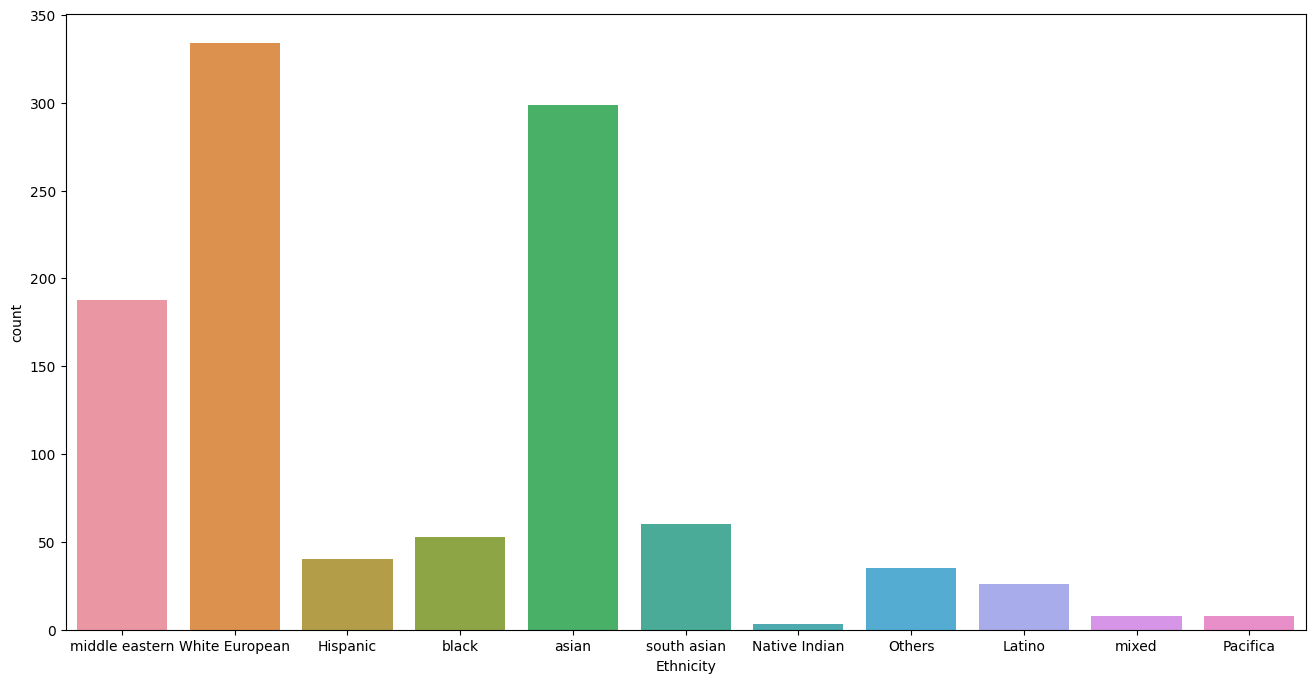

In [8]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = asd)

In [9]:
asd.drop('Qchat-10-Score', axis = 1, inplace = True)

# Data preprocessing

In [10]:
# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
asd.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int32
Ethnicity              int32
Jaundice               int32
Family_mem_with_ASD    int32
Class/ASD Traits       int32
dtype: object

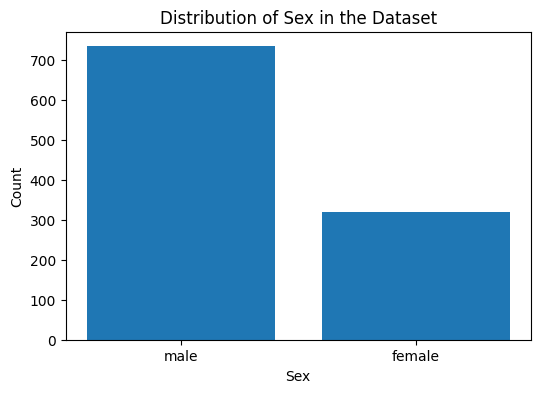

In [33]:
sex_counts = asd['Sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(['male', 'female'], sex_counts.values)
plt.xticks([0, 1], ['male', 'female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in the Dataset')
plt.show()


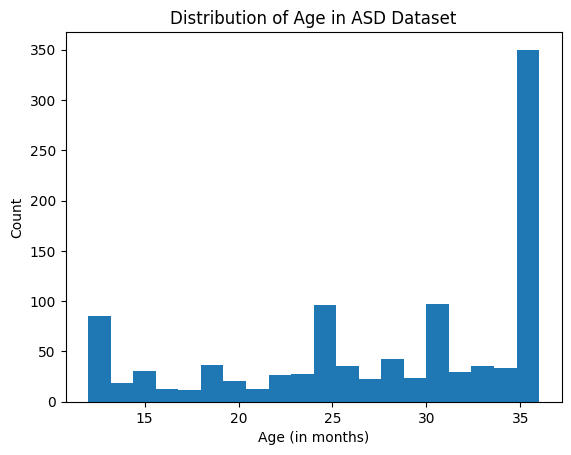

In [35]:
plt.hist(asd['Age_Mons'], bins=20)
plt.xlabel('Age (in months)')
plt.ylabel('Count')
plt.title('Distribution of Age in ASD Dataset')
plt.show()

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils

# Split data into training and testing sets
X = asd.drop(['Class/ASD Traits '], axis=1)
y = asd['Class/ASD Traits ']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Reshape feature data to 3D tensors
x_train_3d = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_3d = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)

# Flatten feature data to 2D arrays
x_train_flat = x_train_3d.reshape(x_train.shape[0], -1)
x_test_flat = x_test_3d.reshape(x_test.shape[0], -1)

# Convert target variable to categorical variable
y_train_categorical = np_utils.to_categorical(y_train, num_classes=2)
y_test_categorical = np_utils.to_categorical(y_test, num_classes=2)

# Normalize feature data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)


# Creating Model Architecture

In [13]:
# Creating the model architecture
# Version 1
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D

# Define the model
model = Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3, and activation function of relu
model.add(Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)))

# Add a max pooling layer with pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a flatten layer to flatten the output from the convolutional and pooling layers
model.add(Flatten())

# Add a fully connected layer with 64 neurons and activation function of relu
model.add(Dense(64, activation='relu'))

# Add a dropout layer with rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 2 neurons and activation function of softmax
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 64)                12352     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                        

In [14]:
# Train model
history = model.fit(x_train_3d, y_train_categorical, epochs=50, batch_size=32, validation_data=(x_test_3d, y_test_categorical))

# Evaluate model on test data
score = model.evaluate(x_test_3d, y_test_categorical, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 1.0825 - accuracy: 0.6323 - val_loss: 0.5093 - val_accuracy: 0.7350
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.6459 - val_loss: 0.4531 - val_accuracy: 0.7382
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5058 - accuracy: 0.7666 - val_loss: 0.3474 - val_accuracy: 0.8454
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.8548 - val_loss: 0.2743 - val_accuracy: 0.9054
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.8969 - val_loss: 0.2440 - val_accuracy: 0.9432
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.8969 - val_loss: 0.2607 - val_accuracy: 0.8675
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.9118 - val_loss: 0.1754 - val_accuracy: 0.9401
Epoch 8/50
24/24 [=

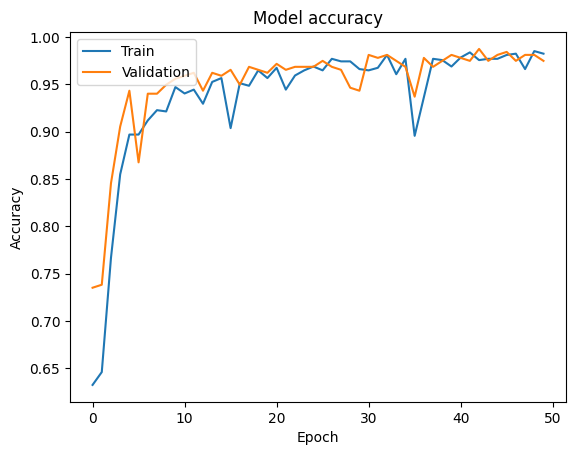

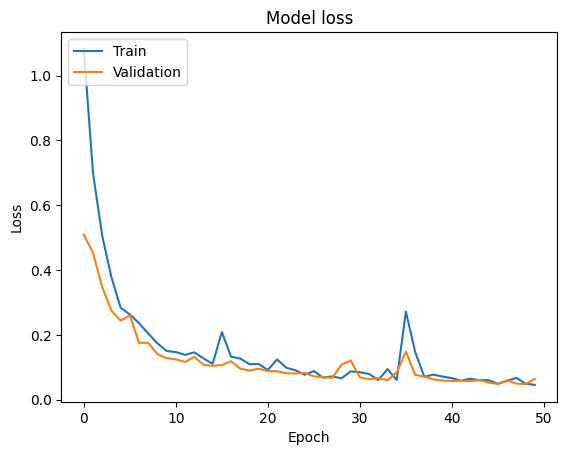

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


The neural network was trained for 50 epochs. During the training, the loss and accuracy on the training and validation data were recorded for each epoch. We can see that the training and validation loss decrease and the accuracy increases over the epochs. However, the training loss decreases faster than the validation loss, which indicates that the neural network may be overfitting to the training data.

In [16]:
# Seems to be overfitting so let us modify the architecture my adding another dropout layer

In [17]:
# Model Version 2 with another dropout layer

# Creating the model architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D

# Define the model
model = Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3, and activation function of relu
model.add(Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)))

# Add a max pooling layer with pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a flatten layer to flatten the output from the convolutional and pooling layers
model.add(Flatten())

# Add a fully connected layer with 64 neurons and activation function of relu
model.add(Dense(64, activation='relu'))

# Add a dropout layer with rate of 0.5
model.add(Dropout(0.5))
# Add another dropout layer with rate of 0.5 after the first Dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer with 2 neurons and activation function of softmax
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 13, 32)            128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 32)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                12352     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                      

In [18]:
# Train model
history = model.fit(x_train_3d, y_train_categorical, epochs=50, batch_size=32, validation_data=(x_test_3d, y_test_categorical))

# Evaluate model on test data
score = model.evaluate(x_test_3d, y_test_categorical, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
24/24 [==============================] - 1s 12ms/step - loss: 1.1113 - accuracy: 0.5753 - val_loss: 0.5616 - val_accuracy: 0.7003
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6621 - val_loss: 0.5216 - val_accuracy: 0.7003
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.6839 - val_loss: 0.4554 - val_accuracy: 0.7539
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.7897 - val_loss: 0.3839 - val_accuracy: 0.9117
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8331 - val_loss: 0.2780 - val_accuracy: 0.9338
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.8426 - val_loss: 0.2497 - val_accuracy: 0.9180
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.8792 - val_loss: 0.2862 - val_accuracy: 0.8707
Epoch 8/50
24/24 [=

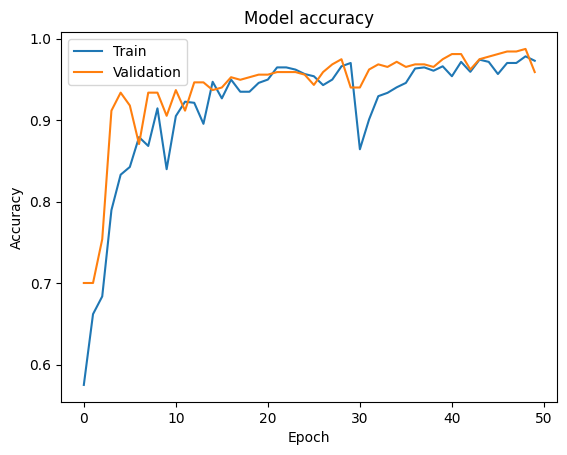

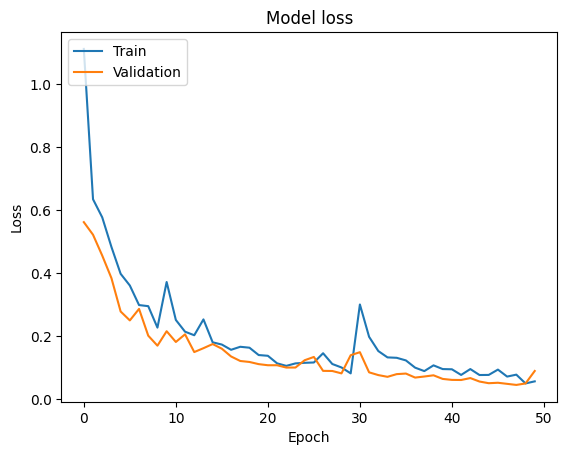

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


The model seems to perform quite well on the validation set. The loss and accuracy on the validation set are consistently improving with each epoch, which suggests that the model is learning to generalize well to new data.

The accuracy on the validation set reaches around 96%, which is quite high. However, it's important to keep in mind that the validation set is relatively small, so this accuracy might not be representative of the model's performance on a larger and more diverse set of data.

To get a better understanding of the model's performance, it's important to evaluate it on a test set that is completely separate from the training and validation sets. This will give a more accurate estimate of the model's ability to generalize to new, unseen data.

# Let's Try Adding Early Stopping

In [20]:
# Model Version 3 with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# Creating the model architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D

# Define the model
model = Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3, and activation function of relu
model.add(Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)))

# Add a max pooling layer with pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a flatten layer to flatten the output from the convolutional and pooling layers
model.add(Flatten())

# Add a fully connected layer with 64 neurons and activation function of relu
model.add(Dense(64, activation='relu'))

# Add a dropout layer with rate of 0.5
model.add(Dropout(0.5))

# Add another dropout layer with rate of 0.5 after the first Dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer with 2 neurons and activation function of softmax
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 13, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 6, 32)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 192)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                12352     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                      

In [21]:
# Train model
history = model.fit(x_train_3d, y_train_categorical, epochs=100, batch_size=32, validation_data=(x_test_3d, y_test_categorical))

# Evaluate model on test data
score = model.evaluate(x_test_3d, y_test_categorical, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 0.9838 - accuracy: 0.5739 - val_loss: 0.5611 - val_accuracy: 0.7003
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.6486 - val_loss: 0.5358 - val_accuracy: 0.7003
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.6893 - val_loss: 0.4904 - val_accuracy: 0.7319
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7300 - val_loss: 0.4047 - val_accuracy: 0.8076
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8033 - val_loss: 0.3155 - val_accuracy: 0.8770
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8467 - val_loss: 0.2673 - val_accuracy: 0.8801
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.8915 - val_loss: 0.2129 - val_accuracy: 0.9306
Epoch 8/100
2

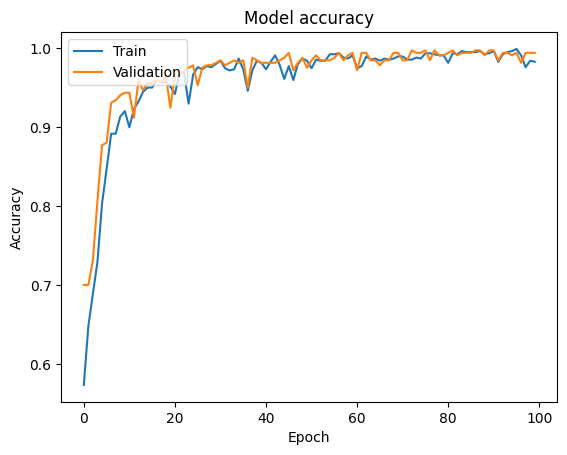

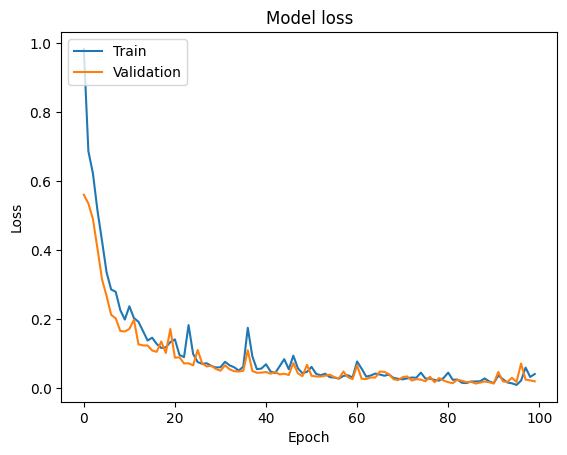

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Tried 1000 epochs but early stopping did not get triggered

Evaluating the model using k-fold-cross-validation

In [23]:
# Version 4
import numpy as np
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
k = 5

# Initialize a KFold instance with k folds
kf = KFold(n_splits=k, shuffle=True, random_state=7)

# Define a list to store the cross-validation results
cv_results = []

# Loop over the folds
for fold, (train_idx, val_idx) in enumerate(kf.split(x_train_scaled, y_train_categorical)):
    
    print(f"Fold {fold+1}")
    print("--------")
    
    # Get the training and validation data for this fold
    x_train_fold = x_train_scaled[train_idx]
    y_train_fold = y_train_categorical[train_idx]
    x_val_fold = x_train_scaled[val_idx]
    y_val_fold = y_train_categorical[val_idx]
    
    # Define the model
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    # Add another dropout layer with rate of 0.5 after the first Dense layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model on the training data for this fold
    model.fit(x_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(x_val_fold, y_val_fold),
              callbacks=[early_stop], verbose=0)
    
    # Evaluate the model on the validation data for this fold and store the results
    results = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    cv_results.append(results)
    
    print(f"Validation loss: {results[0]:.4f}, Validation accuracy: {results[1]*100:.2f}%")
    print("")

# Print the mean and standard deviation of the cross-validation results
cv_results = np.array(cv_results)
print(f"Mean validation loss: {cv_results[:,0].mean():.4f} +/- {cv_results[:,0].std():.4f}")
print(f"Mean validation accuracy: {cv_results[:,1].mean()*100:.2f}% +/- {cv_results[:,1].std()*100:.2f}%")


Fold 1
--------
Epoch 44: early stopping
Validation loss: 0.0477, Validation accuracy: 98.65%

Fold 2
--------
Validation loss: 0.0441, Validation accuracy: 97.97%

Fold 3
--------
Validation loss: 0.0005, Validation accuracy: 100.00%

Fold 4
--------
Validation loss: 0.0018, Validation accuracy: 100.00%

Fold 5
--------
Validation loss: 0.0040, Validation accuracy: 100.00%

Mean validation loss: 0.0196 +/- 0.0215
Mean validation accuracy: 99.32% +/- 0.85%


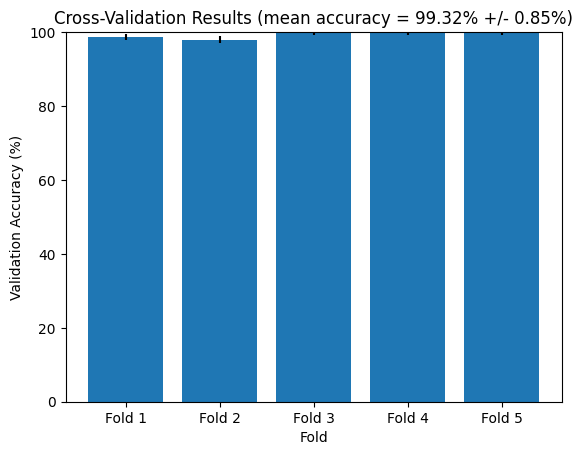

In [24]:
import matplotlib.pyplot as plt

# Extract the mean validation accuracy and standard deviation for each fold
val_acc_mean = cv_results[:, 1].mean() * 100
val_acc_std = cv_results[:, 1].std() * 100

# Create a bar chart with the mean validation accuracy and standard deviation for each fold
plt.bar(range(k), cv_results[:, 1] * 100, yerr=cv_results[:, 1].std() * 100)
plt.xticks(range(k), ['Fold {}'.format(i) for i in range(1, k+1)])
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy (%)')
plt.ylim([0, 100])
plt.title('Cross-Validation Results (mean accuracy = {:.2f}% +/- {:.2f}%)'.format(val_acc_mean, val_acc_std))
plt.show()


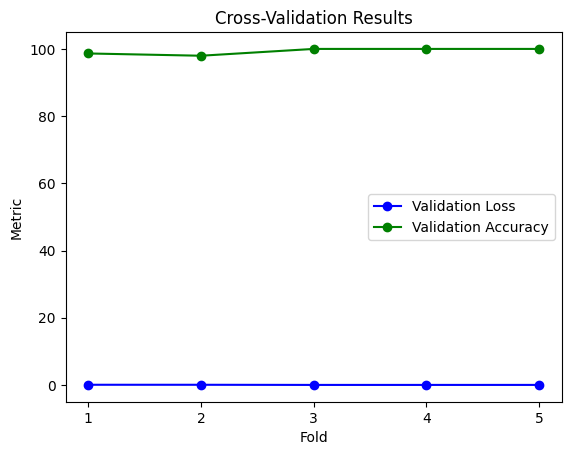

In [25]:
import matplotlib.pyplot as plt

# Extract the validation loss and accuracy values from the cross-validation results
val_loss = cv_results[:, 0]
val_acc = cv_results[:, 1] * 100

# Create a list of fold numbers
folds = range(1, k+1)

# Plot the validation loss and accuracy over the folds
plt.plot(folds, val_loss, 'bo-', label='Validation Loss')
plt.plot(folds, val_acc, 'go-', label='Validation Accuracy')
plt.title('Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.xticks(folds)
plt.legend()
plt.show()
